In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data/en_sample.csv')
data.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation,swiss,canton,language
0,9514846412,7198282.0,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550.0,NaN,...,http://gowalla.com/,Nico Luchsinger,halbluchs,1820.0,703.0,4687.0,"Zurich, Switzerland",yes,ZH,en
1,9516952605,14703863.0,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62.0,NaN,...,http://stone.com/Twittelator,Urs,ugro,75.0,161.0,1390.0,"Zürich, Switzerland",yes,SG,en
2,9517916537,13535402.0,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,\N,\N,550.0,NaN,...,http://gowalla.com/,Patrick Hediger,hediger,1511.0,682.0,12157.0,"Zurich, Switzerland",yes,ZH,en
3,9519149278,14260616.0,2010-02-23 09:32:09,@eyeem When and how can we send photos ? One p...,8.29953,47.4829,\N,9518986782,1.0,NaN,...,http://twitter.com/#!/download/iphone,Roman Keller,RomanKeller,720.0,821.0,7337.0,Switzerland,yes,AG,en
4,9523488851,12391922.0,2010-02-23 12:30:04,I just ousted @keepthebyte as the mayor of Day...,7.59000,47.5550,\N,\N,3.0,NaN,...,http://foursquare.com,Gabriel Walt,GabrielWalt,1445.0,1627.0,1507.0,"Basel, Switzerland",yes,BS,en


In [3]:
data.isnull().any()

id                False
userId            False
createdAt         False
text              False
longitude          True
latitude           True
placeId           False
inReplyTo         False
source            False
truncated          True
placeLatitude      True
placeLongitude     True
sourceName        False
sourceUrl         False
userName          False
screenName        False
followersCount    False
friendsCount      False
statusesCount     False
userLocation       True
swiss             False
canton            False
language          False
dtype: bool

In [4]:
len(data['userId'].unique())

523

C:\Users\fnac\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


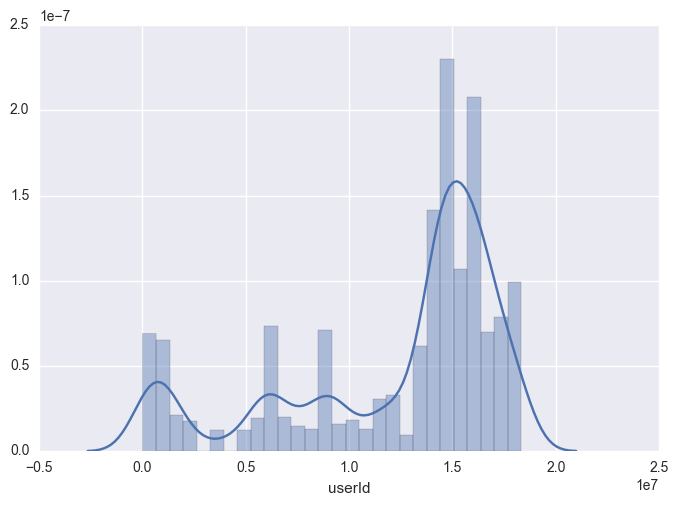

In [7]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(data['userId'])

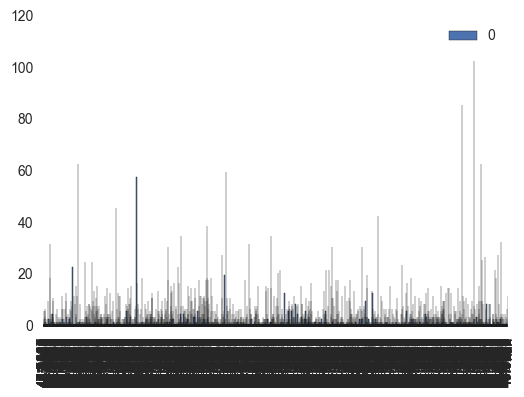

In [8]:
%matplotlib inline
from collections import Counter
frequency = Counter(data['latitude'])
df = pd.DataFrame.from_dict(frequency, orient='index')
df.plot(kind='bar')

In [9]:
data['createdAt'].head()

0    2010-02-23 06:22:40
1    2010-02-23 07:51:47
2    2010-02-23 08:35:39
3    2010-02-23 09:32:09
4    2010-02-23 12:30:04
Name: createdAt, dtype: object

In [52]:
import datetime
days = []
hours = []
isWeekday = []
isAtWork = []
for i in range(0,len(data)):
    day = datetime.datetime.strptime(data.iloc[i]['createdAt'].split(' ')[0], '%Y-%m-%d').strftime('%A')
    days.append(day)
    hour = int(data.iloc[i]['createdAt'].split(' ')[1].split(':')[0])
    hours.append(hour)
    
    if 8<=  hour <= 18: 
        isAtWork.append(True)
    else:
        isAtWork.append(False)
    
    if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
        isWeekday.append(True)
    else:
        isWeekday.append(False)
        
data['Day'] = days
data['Hour'] = hours
data['isAtWork'] = isAtWork
data['isWeekday'] = isWeekday

In [53]:
data.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,friendsCount,statusesCount,userLocation,swiss,canton,language,Day,Hour,isAtWork,isWeekday
0,9514846412,7198282.0,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550.0,NaN,...,703.0,4687.0,"Zurich, Switzerland",yes,ZH,en,Tuesday,6,False,True
1,9516952605,14703863.0,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62.0,NaN,...,161.0,1390.0,"Zürich, Switzerland",yes,SG,en,Tuesday,7,False,True
2,9517916537,13535402.0,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,\N,\N,550.0,NaN,...,682.0,12157.0,"Zurich, Switzerland",yes,ZH,en,Tuesday,8,True,True
3,9519149278,14260616.0,2010-02-23 09:32:09,@eyeem When and how can we send photos ? One p...,8.29953,47.4829,\N,9518986782,1.0,NaN,...,821.0,7337.0,Switzerland,yes,AG,en,Tuesday,9,True,True
4,9523488851,12391922.0,2010-02-23 12:30:04,I just ousted @keepthebyte as the mayor of Day...,7.59000,47.5550,\N,\N,3.0,NaN,...,1627.0,1507.0,"Basel, Switzerland",yes,BS,en,Tuesday,12,True,True


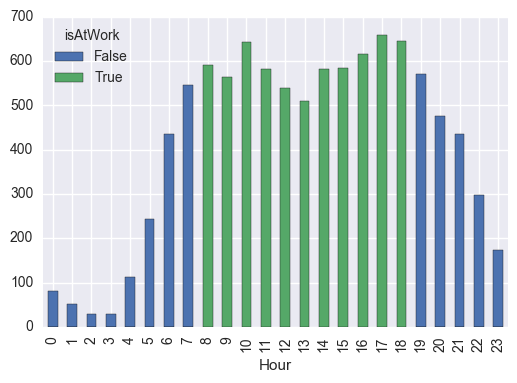

In [55]:
data_count = pd.crosstab(index=data['Hour'],columns= data['isAtWork'])
data_count.plot(kind='bar',stacked='True')

More people tweet while at work especially at 10 and 17 

### TODO: Clean entries where userId has tweeted below a certain threshold

### Studying Mobility Flows:

* We group the tweets by userId
* For each user we determine the least and most recent canton they were in and we count the number of tweets per canton
* For each user we find the home location by looking at the most frequent location of the tweets posted outside of the working hours
* For each user we find the workplace location by looking at the most frequent location of the tweets posted during working hours

In [59]:
users = list(set(data['userId']))
for user in users:
    data[data['userId']==user]['canton']
#data_user_agg = data.groupby('userId').agg(f)

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,friendsCount,statusesCount,userLocation,swiss,canton,language,Day,Hour,isAtWork,isWeekday
454,11107258752,2021381.0,2010-03-26 20:02:07,Walking by — at @dnydegger http://gowal.la/s/2HPn,8.52579,47.3778,4478451a1302dc88,\N,550.0,NaN,...,445.0,1810.0,Zurich | New York,yes,ZH,en,Friday,20,False,True
8125,25821609533120512,2021381.0,2011-01-14 07:48:46,#Zurich_CM @ Amboss Rampe http://instagr.am/p...,8.53158,47.3813,9d585fa0f7109217,\N,7.0,NaN,...,445.0,1810.0,Zurich | New York,yes,ZH,en,Friday,7,False,True
8799,30722832509964288,2021381.0,2011-01-27 20:24:28,I'm at Davids Badezimmer in Zurich http://gowa...,8.52578,47.3779,f7349fa6253975c7,\N,550.0,NaN,...,445.0,1810.0,Zurich | New York,yes,ZH,en,Thursday,20,False,True
